In [1]:
import pandas as pd, numpy as np, datetime, os, sys, pydot
import matplotlib.pyplot as plt, h5py, tensorflow as tf
from keras.models import Model
from keras.layers import Input, Dense, MaxPooling2D, MaxPooling3D, Dropout, BatchNormalization, Flatten,Conv1D, Conv2D, Conv3D, AveragePooling3D, LSTM, Reshape, ConvLSTM2D, TimeDistributed, Masking
from keras import backend as K
from keras.callbacks import History
from keras import Sequential
from keras.layers.normalization import BatchNormalization
from keras.applications import Xception
import glob, netCDF4 as nc, scipy as sc
from scipy import stats
from PIL import Image
from keras.utils import multi_gpu_model
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.utils.vis_utils import plot_model
import os
import shutil

(167, 167)


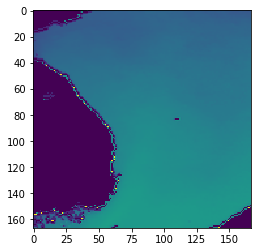

In [48]:
month = '12'
data_path = "csv/"+month
loss_path = '/home/pmimoon/Documents/ocean_conv_1/result/convlstm/'+month+'/loss_graph.png'
result_img_path = '/home/pmimoon/Documents/ocean_conv_1/result/convlstm/'+month+'/'
gt_csv_path = '/home/pmimoon/Documents/ocean_conv_1/result/csv/gt/'+month+'/'
result_csv_path = '/home/pmimoon/Documents/ocean_conv_1/result/csv/pred/'+month+'/'
result_performance_path = '/home/pmimoon/Documents/ocean_conv_1/result/convlstm/'+month+'/result.txt'
result_frame_path = '/home/pmimoon/Documents/ocean_conv_1/result/convlstm/'+month+'/result_frame.txt'

#by month, edit path.
file_list = sorted(os.listdir(data_path))#crop_20140310.daily.mer.sst.tif
for i in range(len(file_list)):
    file_list[i]=data_path+"/"+file_list[i]
#im = np.array(Image.open(file_list[0]))
im = np.loadtxt(file_list[0],delimiter = ',',dtype = np.float32)
print(im.shape)
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))
plt.imshow(im)
#vmin = np.min((Y_test[0,:,:,:,2], y_predict[0,:,:,:,2]))
#vmax = np.max((Y_test[0,:,:,:,2], y_predict[0,:,:,:,2]))

#    p1 = ax[0].pcolormesh(Y_test[0,i,:,:,2], vmin=vmin, vmax=vmax)




#plt.show(ax[0].pcolormesh(im[:,:,:]))


In [49]:

vel_data = []
for i in file_list:
    #temp_img = Image.open(i)
    temp_img = np.array(np.loadtxt(i,delimiter = ',',dtype = np.float32))
    #print(temp_img.shape)
    #print(temp_img)
    #temp_img = np.array(temp_img)
    #print(temp_img)
    resize_img = np.resize(temp_img,(167,167,1))
    #print(resize_img.shape)
    vel_data.append(np.array(resize_img))
vel_data = np.array(vel_data)
print("durldu")
#print(vel_data[0,:,:].shape)
print(vel_data)
#plt.imshow(vel_data[0])
#vel = [Image.open(filename) for filename in file_list]
#print(vel)
#vel_data = np.array(vel,dtype='uint8')
#dom_size_y, dom_size_x= nc.Dataset(file_path).variables['temp'][0,:-1,:-1,0].shape
#files = nc.Dataset(file_path).variables['temp'][:,:,:,:]

#dom_size_y, dom_size_x =581,411
#print("dom_size_x : ", dom_size_x)
#print("dom_size_y : ", dom_size_y)

durldu
[[[[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.66]
   [ 9.66]
   [ 9.8 ]]

  [[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.8 ]
   [ 9.94]
   [ 9.94]]

  [[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [10.22]
   [10.22]
   [10.22]]

  ...

  [[ 3.78]
   [ 0.  ]
   [ 3.78]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]

  [[ 5.6 ]
   [ 3.78]
   [ 3.78]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]

  [[ 9.24]
   [11.62]
   [10.64]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]]


 [[[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.38]
   [ 9.24]
   [ 9.38]]

  [[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.38]
   [ 9.38]
   [ 9.38]]

  [[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.66]
   [ 9.66]
   [ 9.66]]

  ...

  [[ 3.78]
   [ 0.  ]
   [ 3.78]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]

  [[ 5.6 ]
   [ 3.78]
   [ 3.78]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]

  [[ 5.6 ]
   [10.78]
   [ 9.94]
   ...
   [ 0.  ]
   [ 0.  ]
   [ 0.  ]]]


 [[[ 0.  ]
   [ 0.  ]
   [ 0.  ]
   ...
   [ 9.1 ]
   [ 9.1 ]
   [ 9.1 ]]



In [50]:
def make_datas(file_list, dom_size_y, dom_size_x):
    print(len(file_list))
    vel_data = np.zeros((len(file_list), dom_size_y, dom_size_x, 3))

    zero = np.zeros((dom_size_y, dom_size_x))
    
    
    #for i, file in enumerate(file_list):

        #data = nc.Dataset(file, 'r')

        #uvel = np.ma.masked_invalid(data['u'][0,0,:-1,:])
        #vvel = np.ma.masked_invalid(data['v'][0,0,:,:-1])
        #temp  = np.ma.masked_invalid(data['temp'][0,0,:-1,:-1])

        #data.close()

        #vel_data[i, :, :, 0] = file[:-1,0,0]
        #vel_data[i, :, :, 1] = file[0,:-1,0]
        #vel_data[i, :, :, 2] = file[0,0,:-1]

        #vel_data[i, :, :, 0][uvel.mask == True] = 0
        #vel_data[i, :, :, 1][vvel.mask == True] = 0
        #vel_data[i, :, :, 2][temp.mask == True] = 0
   
    return file_list


In [51]:
#raw_vels = make_datas(files, dom_size_x, dom_size_y)
raw_vels = vel_data
print(raw_vels.shape)

(759, 167, 167, 1)


In [52]:
def generate_movies(vel_set, sample, input_frame, pred_frame):
    
    movie_x, movie_y = [], []
    
    for s in range(sample):        
        frame_x, frame_y = [], []
        
        for t in range(input_frame):
            frame_x.append(vel_set[t+s,:,:,:])
            
        for t in range(pred_frame):
            frame_y.append(vel_set[input_frame+t+s,:,:,:])              
        
        movie_x.append(frame_x)
        movie_y.append(frame_y)
                  
    return np.array(movie_x), np.array(movie_y)



In [53]:


x_data, y_data = generate_movies(vel_set=raw_vels, sample=600, input_frame=6, pred_frame=6)
print(x_data.shape, y_data.shape)


(600, 6, 167, 167, 1) (600, 6, 167, 167, 1)


In [54]:

x_train, y_train = x_data[:500, :, :, :, :], y_data[:500, :, :, :, :]
x_test,  y_test  = x_data[500:, :, :, :, :], y_data[500:, :, :, :, :]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(500, 6, 167, 167, 1) (500, 6, 167, 167, 1)
(100, 6, 167, 167, 1) (100, 6, 167, 167, 1)


In [55]:


features = 1
'''
X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], x_train.shape[3], features))
Y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], y_train.shape[3], features))

X_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], x_test.shape[3], features))
Y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], y_test.shape[3], features))
'''
X_train = x_train
Y_train = y_train
X_test = x_test
Y_test = y_test


In [56]:


print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(500, 6, 167, 167, 1) (500, 6, 167, 167, 1) (100, 6, 167, 167, 1) (100, 6, 167, 167, 1)


In [57]:
gpus = tf.config.experimental.list_physical_devices('GPU')
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
print(gpus)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13410308202525461126
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 7595180619069218983
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10578967641020192751
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 7210359872
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2014084515836966927
physical_device_desc: "device: 0, name: GeForce RTX 2080 SUPER, pci bus id: 0000:01:00.0, compute capability: 7.5"
]
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [58]:
from keras.utils.vis_utils import plot_model
import pydot
with tf.device('/GPU:0'):
    model = Sequential()

    input_shape = (None, X_train.shape[2], X_train.shape[3], features)

    model.add(ConvLSTM2D(filters=12, kernel_size=(3, 3), activation='linear', padding='same',input_shape=input_shape, return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM2D(filters=24, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM2D(filters=12, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM2D(filters=6, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM2D(filters=12, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.add(BatchNormalization())
    model.add(ConvLSTM2D(filters=6, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.add(BatchNormalization())
    #added
    #model.add(ConvLSTM2D(filters=3, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    #model.add(BatchNormalization())
    #added
    model.add(ConvLSTM2D(filters=1, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))
    model.summary()
    plot_model(model,to_file="model_plot.png",show_shapes=True,show_layer_names = True)
    #if last output is (168,168,3), then change the filter size like below 
    #model.add(ConvLSTM2D(filters=3, kernel_size=(3, 3), activation='linear', padding='same',return_sequences=True))

    #parallel_model = multi_gpu_model(model, gpus=4)

    #parallel_model.compile(loss='mse', optimizer='adam')
    model.compile(loss='mse', optimizer='adam')
    
    
    
    #history = parallel_model.fit(X_train, Y_train, batch_size=50, epochs=30, verbose=1, validation_split=0.05)
    history = model.fit(X_train, Y_train, batch_size=8, epochs=100, verbose=1, validation_split=0.05)
    

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_21 (ConvLSTM2D) (None, None, 167, 167, 12 5664      
_________________________________________________________________
batch_normalization_18 (Batc (None, None, 167, 167, 12 48        
_________________________________________________________________
conv_lst_m2d_22 (ConvLSTM2D) (None, None, 167, 167, 24 31200     
_________________________________________________________________
batch_normalization_19 (Batc (None, None, 167, 167, 24 96        
_________________________________________________________________
conv_lst_m2d_23 (ConvLSTM2D) (None, None, 167, 167, 12 15600     
_________________________________________________________________
batch_normalization_20 (Batc (None, None, 167, 167, 12 48        
_________________________________________________________________
conv_lst_m2d_24 (ConvLSTM2D) (None, None, 167, 167, 6)

Epoch 59/100
60/60 [==============================] - 32s 535ms/step - loss: 3.1688 - val_loss: 4.0903
Epoch 60/100
60/60 [==============================] - 32s 535ms/step - loss: 3.1583 - val_loss: 3.8430
Epoch 61/100
60/60 [==============================] - 32s 536ms/step - loss: 3.2708 - val_loss: 42.8057
Epoch 62/100
60/60 [==============================] - 32s 534ms/step - loss: 4.0365 - val_loss: 9.8083
Epoch 63/100
60/60 [==============================] - 32s 536ms/step - loss: 3.5825 - val_loss: 8.2750
Epoch 64/100
60/60 [==============================] - 32s 535ms/step - loss: 3.5513 - val_loss: 5.6599
Epoch 65/100
60/60 [==============================] - 32s 535ms/step - loss: 3.4277 - val_loss: 4.1612
Epoch 66/100
60/60 [==============================] - 32s 533ms/step - loss: 3.3442 - val_loss: 4.0618
Epoch 67/100
60/60 [==============================] - 32s 535ms/step - loss: 3.3526 - val_loss: 4.0913
Epoch 68/100
60/60 [==============================] - 32s 535ms/step - l

In [59]:
    print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f07b7882be0>>


In [60]:
import timeit
start_time = timeit.default_timer()
y_predict = model.predict(X_test[:,:,:,:,:])
end_time = timeit.default_timer()
print("test time for 100 sequences :", end_time-start_time)

print(y_predict.shape)

y_predict = y_predict.reshape(y_predict.shape[0], y_predict.shape[1], y_predict.shape[2], y_predict.shape[3], 1)


test time for 100 sequences : 2.43507815990597
(100, 6, 167, 167, 1)


In [61]:

t = 1
for p_frame in range(100):
    for i in range(6):
        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))

        vmin = np.min((Y_test[p_frame,i,:,:,0], y_predict[p_frame,i,:,:,0]))
        vmax = np.max((Y_test[p_frame,i,:,:,0], y_predict[p_frame,i,:,:,0]))


        p1 = ax[0].pcolormesh(np.flipud(Y_test[p_frame,i,:,:,0]), vmin=vmin, vmax=vmax)
        p2 = ax[1].pcolormesh(np.flipud(y_predict[p_frame,i,:,:,0]), vmin=vmin, vmax=vmax)
        p3 = ax[2].pcolormesh(np.flipud(np.abs(y_predict[p_frame,i,:,:,0]-Y_test[p_frame,i,:,:,0])),vmin=vmin,vmax=vmax)
        fig.colorbar(p1, ax=ax.ravel().tolist())
        plt.savefig(result_img_path+str(p_frame)+"_"+str(i)+".png")
        




'\nt = 1\nfor p_frame in range(100):\n    for i in range(6):\n        fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))\n\n        vmin = np.min((Y_test[p_frame,i,:,:,0], y_predict[p_frame,i,:,:,0]))\n        vmax = np.max((Y_test[p_frame,i,:,:,0], y_predict[p_frame,i,:,:,0]))\n\n\n        p1 = ax[0].pcolormesh(np.flipud(Y_test[p_frame,i,:,:,0]), vmin=vmin, vmax=vmax)\n        p2 = ax[1].pcolormesh(np.flipud(y_predict[p_frame,i,:,:,0]), vmin=vmin, vmax=vmax)\n        p3 = ax[2].pcolormesh(np.flipud(np.abs(y_predict[p_frame,i,:,:,0]-Y_test[p_frame,i,:,:,0])),vmin=vmin,vmax=vmax)\n        fig.colorbar(p1, ax=ax.ravel().tolist())\n        plt.savefig(result_img_path+str(p_frame)+"_"+str(i)+".png")\n        \n'

In [62]:
import math
#result_f = open('/home/pmimoon/Documents/ocean_conv_1/result/convlstm/04/result.txt','w')
#result_performance_path = '/home/pmimoon/Documents/ocean_conv_1/result/convlstm/'+month+'/result.txt'
result_f = open(result_frame_path,'w')
###Function for calculate Correlation
def np_crop_by_n_block(img,padding,npad):
    #padding = 1
    #npad=((1,0),(1,0))###(upper side,down side),(left side,right side)
    img_padding = np.pad(img,npad,'constant',constant_values=(0))#constant values means "i will pad to image by value 0!"
    sp_by_img = np.split(img_padding,7)
    arr_img = np.array([np.split(x,7,1) for x in sp_by_img])#7X7 crop block list arr
    return arr_img

def cal_cor(img1, img2):
    return np.multiply(img2,img1).sum()/np.sqrt(np.multiply(np.square(img1).sum(),np.square(img2).sum()))

def cal_all_crop_block_cor(img1,img2,w,h):#w = width, h = height
    #calculate correlation between gt&predicted image
    #two images are cropped by block that is N X N
    #we calculate each block correlation and finally caculate average correlation in N X N blocks
    COR = 0
    for pixel_x in range(w):
        for pixel_y in range(h):
            #temp = np.multiply(img2[pixel_x][pixel_y],img1[pixel_x][pixel_y]).sum()/(math.sqrt(np.square(img1[pixel_x][pixel_y]).sum()*np.square(img2[pixel_x][pixel_y]).sum())+0.0000001)
            #upper = np.multiply(img2[pixel_x][pixel_y],img1[pixel_x][pixel_y]).sum()
            #down = math.sqrt(np.square(img1[pixel_x][pixel_y]).sum()*np.square(img2[pixel_x][pixel_y]).sum())+0.0001 
#            print("upper",upper)
#            print("down",down)
            #print(temp)
            if (img1[pixel_x][pixel_y]==img2[pixel_x][pixel_y]).all():
                COR = COR + 1.0
            else:
                COR = COR + np.multiply(img2[pixel_x][pixel_y],img1[pixel_x][pixel_y]).sum()/(math.sqrt(np.square(img1[pixel_x][pixel_y]).sum()*np.square(img2[pixel_x][pixel_y]).sum())+0.0000001)
    return COR/(w*h)
###Function for calculate Correlation

total_RMSE = [0,0,0,0,0,0]
total_MSE = [0,0,0,0,0,0]
total_MAE = [0,0,0,0,0,0]
total_COR = [0,0,0,0,0,0]


for p_frame in range(100):
    RMSE = 0
    MSE = 0
    MAE = 0
    COR = 0#CORRELATION
    for i in range(6):
        img1 = Y_test[p_frame,i,:,:,0]
        img2 = y_predict[p_frame,i,:,:,0]
        ########image crop and calculate correlation
        padding = 1
        npad=((1,0),(1,0))###(upper side,down side),(left side,right side)
        arr_img1 = np_crop_by_n_block(img1,padding,npad)
        arr_img2 = np_crop_by_n_block(img2,padding,npad)
    
        COR = cal_all_crop_block_cor(arr_img1,arr_img2,7,7)
        #COR = COR/49        
        ########image crop and calculate correlation
        RMSE = np.sqrt(np.mean((img2-img1)**2))
        MAE = np.mean(np.abs(img2-img1))
        MSE = np.mean((img2-img1)**2)
        total_COR[i] += COR
        total_RMSE[i] += RMSE
        total_MSE[i] += MSE
        total_MAE[i] += MAE
        #COR = np.multiply(img2,img1).sum()/np.sqrt(np.multiply(np.square(img1).sum(),np.square(img2).sum()))
        #COR = np.multiply(arr_img2[6][6],arr_img1[6][6]).sum()/np.sqrt(np.multiply(np.square(arr_img1[6][6]).sum(),np.square(arr_img2[6][6]).sum()))

        
        
for i in range(6):
    result_f.write("total RMSE at "+str(i)+":"+str(total_RMSE[i]/100)+"\n")
    result_f.write("total MSE at "+str(i)+":"+str(total_MSE[i]/100)+"\n")
    result_f.write("total MAE at "+str(i)+":"+str(total_MAE[i]/100)+"\n")
    result_f.write("total Correlation at "+str(i)+":"+str(total_COR[i]/100)+"\n")

result_f.close()
# In[20]:
'''

y_pred = nc.Dataset('./temp_result.nc','w',format="NETCDF4")#format="NETCDF4"  ++++added++++

y_pred.createDimension('t', None)
y_pred.createDimension('idy', 165)
y_pred.createDimension('idx', 167)
y_pred.createDimension('filter', 3)
y_pred.createDimension('frame',6)

pred = y_pred.createVariable('pred','f4',('t', 'frame', 'idy', 'idx', 'filter'))
test = y_pred.createVariable('test','f4',('t', 'frame', 'idy', 'idx', 'filter'))

pred[:] = y_predict
test[:] = y_test

y_pred.close()
'''

'\n\ny_pred = nc.Dataset(\'./temp_result.nc\',\'w\',format="NETCDF4")#format="NETCDF4"  ++++added++++\n\ny_pred.createDimension(\'t\', None)\ny_pred.createDimension(\'idy\', 165)\ny_pred.createDimension(\'idx\', 167)\ny_pred.createDimension(\'filter\', 3)\ny_pred.createDimension(\'frame\',6)\n\npred = y_pred.createVariable(\'pred\',\'f4\',(\'t\', \'frame\', \'idy\', \'idx\', \'filter\'))\ntest = y_pred.createVariable(\'test\',\'f4\',(\'t\', \'frame\', \'idy\', \'idx\', \'filter\'))\n\npred[:] = y_predict\ntest[:] = y_test\n\ny_pred.close()\n'